# (prosper loan dataset)
## by (Ali Nasser Mohamed)

## Preliminary Wrangling

> Briefly introduce your dataset here.

this is the prosper loan dataset 
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [52]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

%matplotlib inline



> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
df=pd.read_csv("prosperLoanData.csv", encoding= 'unicode_escape')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
columns_of_interest=["Term","LoanStatus","BorrowerAPR","BorrowerRate","ListingCategory (numeric)","LoanOriginalAmount","CurrentlyInGroup","ProsperRating (numeric)","EmploymentStatus","IsBorrowerHomeowner","StatedMonthlyIncome","TotalProsperLoans"]
print(len(columns_of_interest))
spec_df=df[columns_of_interest]
spec_df.head()

12


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),LoanOriginalAmount,CurrentlyInGroup,ProsperRating (numeric),EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,TotalProsperLoans
0,36,Completed,0.16516,0.1580,0,9425,True,NaN,Self-employed,True,3083.333333,NaN
1,36,Current,0.12016,0.0920,2,10000,False,6.0,Employed,False,6125.000000,NaN
2,36,Completed,0.28269,0.2750,0,3001,True,NaN,Not available,False,2083.333333,NaN
3,36,Current,0.12528,0.0974,16,10000,False,6.0,Employed,True,2875.000000,NaN
4,36,Current,0.24614,0.2085,2,15000,False,3.0,Employed,True,9583.333333,1.0


In [5]:
spec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
LoanOriginalAmount           113937 non-null int64
CurrentlyInGroup             113937 non-null bool
ProsperRating (numeric)      84853 non-null float64
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
dtypes: bool(2), float64(5), int64(3), object(2)
memory usage: 8.9+ MB


### cleaning the data (substitute or drop NAN values)

In [7]:
spec_df.dropna(subset=["EmploymentStatus"],inplace=True)
spec_df.loc[spec_df["ProsperRating (numeric)"]=="NAN"]=0
spec_df.loc[spec_df["TotalProsperLoans"]=="NAN"]=0

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

### What is/are the main feature(s) of interest in your dataset?

> the main feature we are going to study here is interest rate(	BorrowerAPR) for each borrower and what affects this rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>we expect many variables affect the interest rate such amount of loan and the period of charge off and more 
we in included all the features we expect this feature in anew data frame called spec_df

## Univariate Exploration


firstly we start by seeing the distibution of our main feature 

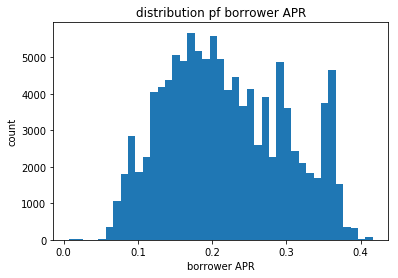

In [8]:
bins=np.arange(np.min(spec_df["BorrowerAPR"]),np.max(spec_df["BorrowerAPR"]),0.01)
plt.hist(data=spec_df,x="BorrowerAPR",bins=bins);
plt.xlabel("borrower APR")
plt.ylabel("count")
plt.title("distribution pf borrower APR")
plt.show()

from the above distibution we conclude that there is no outliers on the borrowerAPR data and most of the annual interest rate is between 0.15 and .35

also we want to see the distribution of amount of loan and Borrower rate as we expect  them to have the most effect on APR

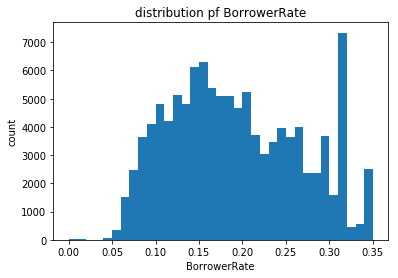

In [9]:
bins=np.arange(np.min(spec_df["BorrowerRate"]),np.max(spec_df["BorrowerRate"]),0.01)
plt.hist(data=spec_df,x="BorrowerRate",bins=bins);
plt.xlabel("BorrowerRate")
plt.ylabel("count")
plt.title("distribution pf BorrowerRate")
plt.show()

from the above distribution we see that the interest rate has the same distribution of Borrower APR  

we want see which kind of people go and take aloan from prosper

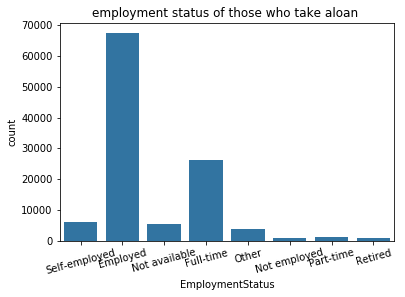

In [10]:
base_color=sb.color_palette()[0]
sb.countplot(data=spec_df,x="EmploymentStatus",color=base_color);
plt.xticks(rotation=15)
plt.title("employment status of those who take aloan ")
plt.show()

we find that most of them is employed people

we want to see the distibution of terms in the data set

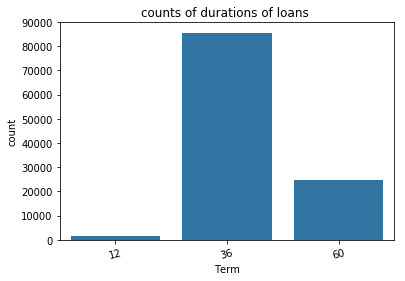

In [11]:
base_color=sb.color_palette()[0]
sb.countplot(data=spec_df,x="Term",color=base_color);
plt.xticks(rotation=15)
plt.title("counts of durations of loans ")
plt.show()

we found that most of loans are given to borroers on 3 years payments 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> from the above distibutions we found that interst rate and Borrower APR have approximatly the same distibution and the value of Borrower Apr is betwwen 1.5 and 3.5
also we found that most of peopele who take aloan is employed ones

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> we do some wranling operations on the data that we drop null values from employment status and substitute null values in ProsperRating (numeric) and totalprosperloan by 0

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

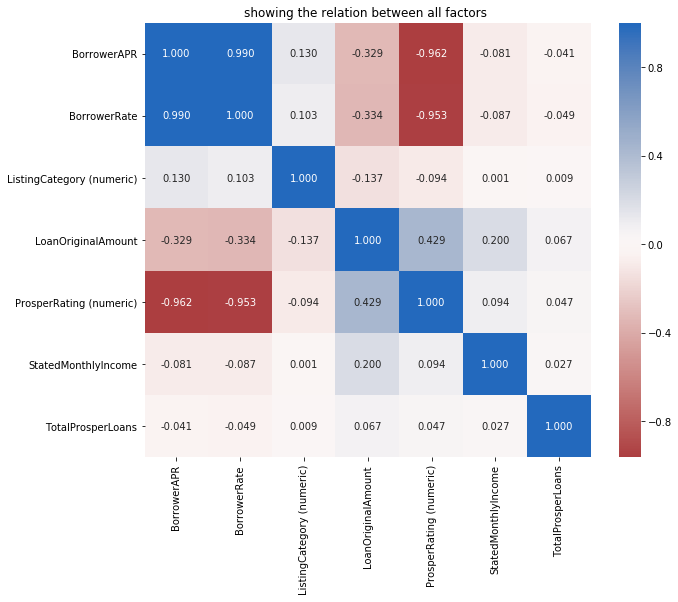

In [13]:
plt.figure(figsize = [10, 8])
numerics=["BorrowerAPR","BorrowerRate","ListingCategory (numeric)","LoanOriginalAmount","ProsperRating (numeric)","StatedMonthlyIncome","TotalProsperLoans"]
sb.heatmap(spec_df[numerics].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("showing the relation between all factors ")
plt.show()


looking at the heat map above we could see avery strong positive relation between Borrower APR and borrower rate 
and alse anegative relation between Borrower APR and loan original amount
there is no effect of Total prosper loan and state monthly income on Borrower APR

taking alook on the shape of these correlations by using seaborn pairGrid function 

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1440x1440 with 0 Axes>

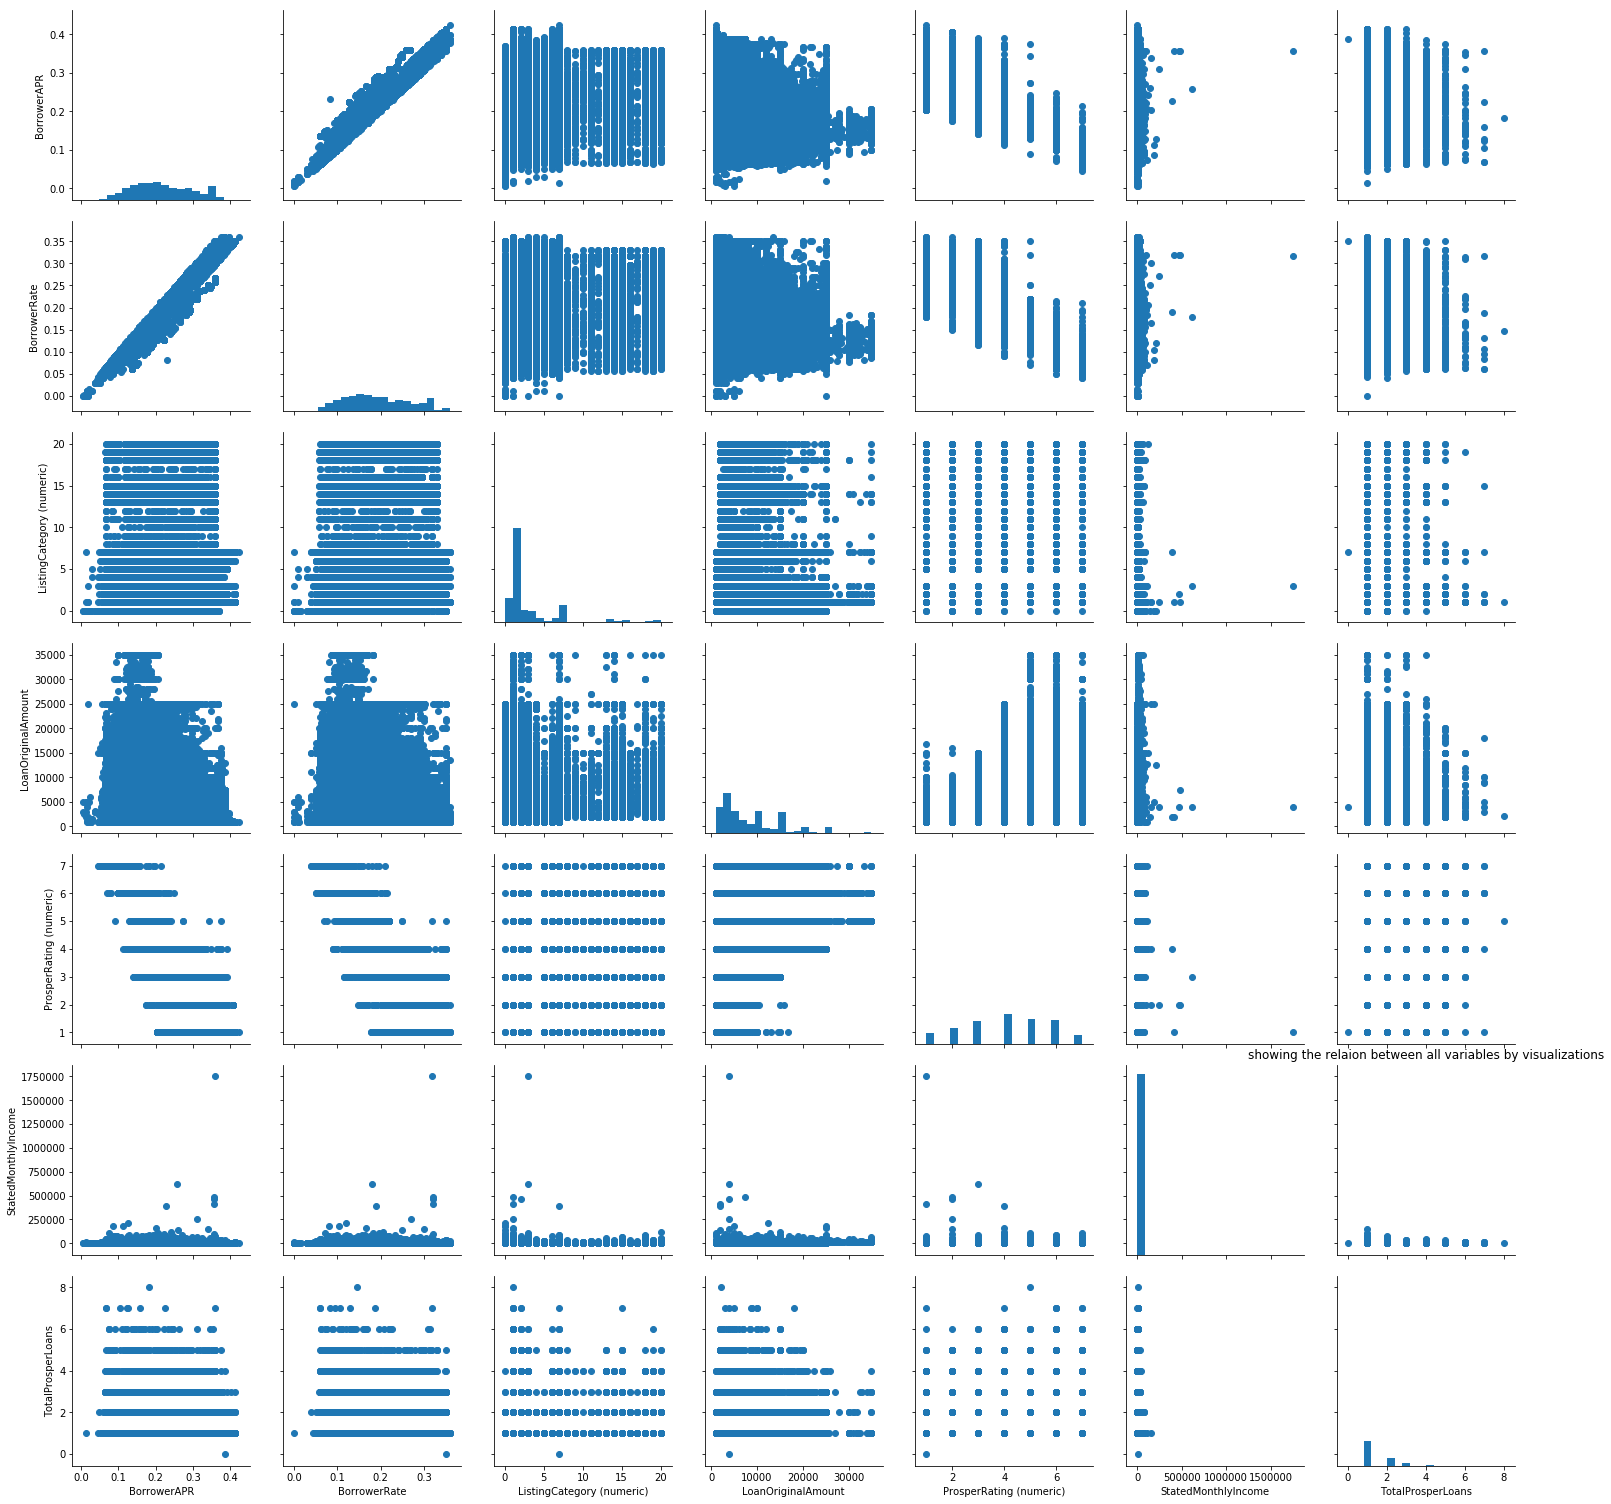

In [14]:
plt.figure(figsize=[20,20])
g = sb.PairGrid(data = spec_df, vars = numerics,size=3)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title("showing the relaion between all variables by visualizations")
plt.show()

all the visualizations here confirm what we notice in the heatmap that 
that there is avery strong positive relation between Borrower APR and borrower rate 
and alse anegative relation between Borrower APR and loan original amount
there is no effect of Total prosper loan and state monthly income on Borrower APR

we alse want to study the relation between Term and amount of loan and which this affects Borrower APr or not 

In [16]:
#make alog function to transfer original loan amounts to logaritimic values 
def log_trans(x,inverse=False):
   if not inverse:
        return np.log10(x)
   else:
      return np.power(10, x) 
spec_df["log_LoanOriginalAmount"]=spec_df["LoanOriginalAmount"].apply(log_trans)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


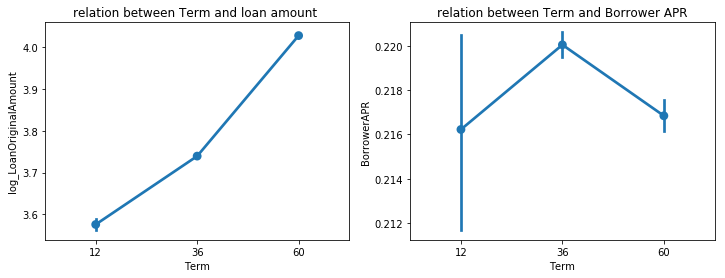

In [22]:

spec_df["Term"] = spec_df["Term"].astype(object,replace=True)
fug,ax=plt.subplots(ncols=2,figsize=[12,4])
sb.pointplot(data=spec_df,x="Term",y="log_LoanOriginalAmount",ax=ax[0])
sb.pointplot(data=spec_df,x="Term",y="BorrowerAPR",ax=ax[1])
ax[0].set_title("relation between Term and loan amount ")
ax[1].set_title("relation between Term and Borrower APR")
plt.show()

as we expected that high amount of loan will be taken on a large term 
as we expect that increasing the term will increase the BorrowerAPR but we found alse that at higher terms the mean of BorrowerAPR decreases which need more investigations 

we also want to see the relation of borrower APR and both employment status and have a home or not  

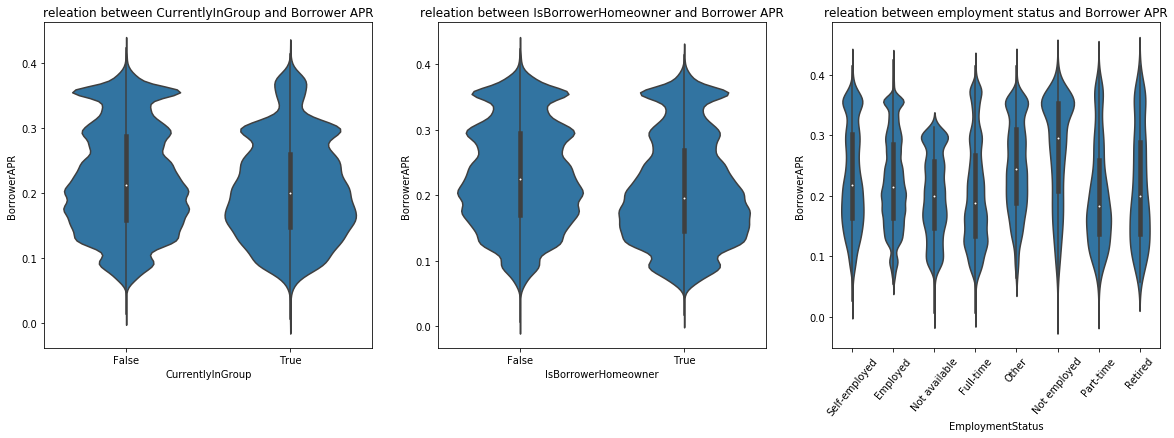

In [33]:
fug,ax=plt.subplots(ncols=3,figsize=[20,6])
sb.violinplot(data=spec_df,x="EmploymentStatus",y="BorrowerAPR",ax=ax[2],color=base_color)
ax[2].set_title("releation between employment status and Borrower APR")

sb.violinplot(data=spec_df,x="IsBorrowerHomeowner",y="BorrowerAPR",ax=ax[1],color=base_color)
ax[1].set_title("releation between IsBorrowerHomeowner and Borrower APR")
sb.violinplot(data=spec_df,x="CurrentlyInGroup",y="BorrowerAPR",ax=ax[0],color=base_color)
ax[0].set_title("releation between CurrentlyInGroup and Borrower APR")
plt.xticks(rotation=50)
plt.show()

From the above plots we see the employment status affects the average BorrowerAPR and also having home affects BorrowerApR
but being in group doesnot affect it very much

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> as we see from the heatmap there is astrong relation between Borrower APR and prosper rating (numeric)
alse there is very strong relation  between interest rate and Borrower APR 
and we could see there is a negative relation with our main feature and amount of loan  
also we notice that  the employment status affects the average BorrowerApR and also having home aggects BorrowerApR
but being in group doesnot affect it very much

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> there is arelation between loan amount and prosper rating (numeric) increasing prosper rating make the prosper more confident to give the borrower high amount af loan 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

see the effect of Employment Status and Is Borrower Homeowner on BorrowerAPR

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


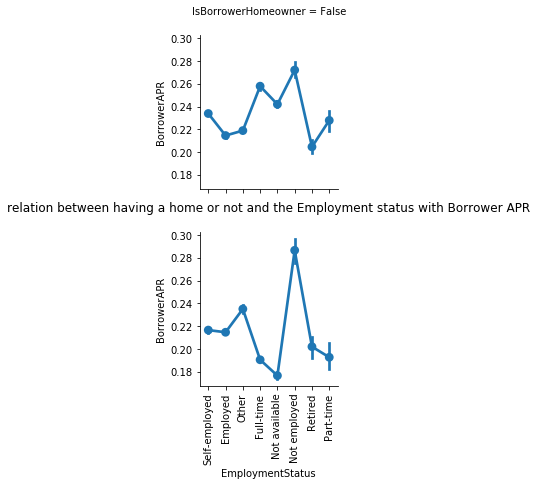

In [54]:

g = sb.FacetGrid(data = spec_df, col = 'IsBorrowerHomeowner',col_wrap=1, size = 3)
g.map(sb.pointplot, 'EmploymentStatus', 'BorrowerAPR', color = base_color);
g.set_ylabels('BorrowerAPR')
plt.xticks(rotation=90)
plt.title("relation between having a home or not and the Employment status with Borrower APR")
plt.show()

as we expexted from the previos part that being  employed and have gome make the APR lower 

#####  also we want to see the effect of both original amount of loan and Term  on APR


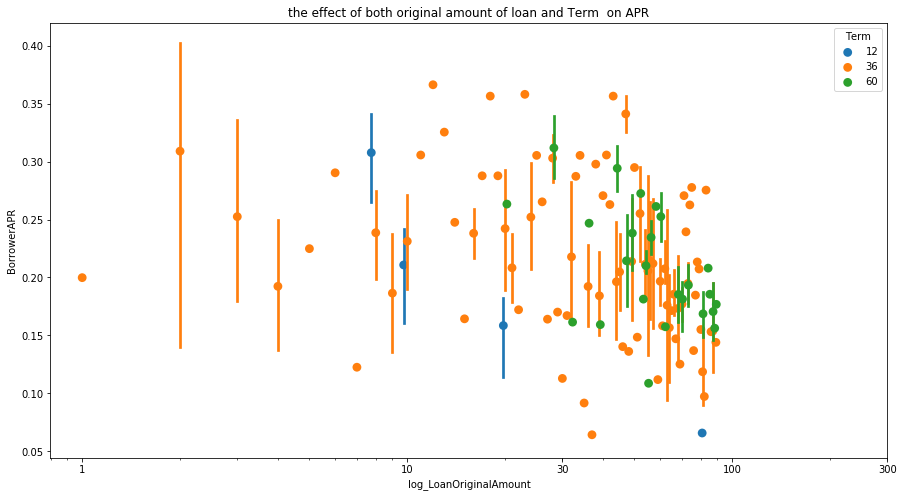

In [39]:
plt.figure(figsize=[15,8])
loc=np.random.choice(spec_df.shape[0],500,replace=True)
sample=spec_df.loc[loc,:]
sb.pointplot(data=sample,x="log_LoanOriginalAmount",y="BorrowerAPR",hue="Term",linestyles = '',dodge = 0.5)
plt.title('the effect of both original amount of loan and Term  on APR')
plt.xscale("log")
plt.ylabel('BorrowerAPR')
plt.xlabel("log_LoanOriginalAmount")
plt.xticks([1,10,30,100,300], [1,10,30,100,300])
plt.show()


we now could understand why the mean of borrower APR become smaller with increase in term 
that happens because loans of high terms has a very high original laon amount and with incrasing the original amount the Borrower APR become smaller

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the first result we found is that being employed and have gome make the Borrower APR lower
the second result was with higher original amount of loan the he Borrower APR  become lower

### Were there any interesting or surprising interactions between features?

>  loans of high terms has a very high original laon amount and with incrasing the original amount 